In [5]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 16pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 16pt; line-height: 140%;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# plt.rc('font', family=font_name)
# plt.rcParams['axes.unicode_minus'] = False

corrE           0.453747
corrNE          0.096776
corr_diff       0.356971
corrEZ          0.489409
corrNEZ         0.097080
Zobs(TCPS)      3.640381
p_value         0.000272
FDR             0.011805
negLog10_FDR    1.927949
Name: (APC, MECP2), dtype: float64
corrE          -0.064932
corrNE         -0.427870
corr_diff       0.362938
corrEZ         -0.065023
corrNEZ        -0.457286
Zobs(TCPS)      3.639762
p_value         0.000273
FDR             0.011823
negLog10_FDR    1.927276
Name: (BMI1, MSX1), dtype: float64


Text(0.27, 0.51, 'TCP score: 3.6, FDR: 1.2e-02')

Text(0.77, 0.51, 'TCP score: 3.6, FDR: 1.2e-02')

corrE          -0.443703
corrNE         -0.077042
corr_diff      -0.366662
corrEZ         -0.476832
corrNEZ        -0.077194
Zobs(TCPS)     -3.708196
p_value         0.000209
FDR             0.010040
negLog10_FDR    1.998257
Name: (CEBPE, AATF), dtype: float64
corrE           0.038421
corrNE          0.412666
corr_diff      -0.374245
corrEZ          0.038440
corrNEZ         0.438820
Zobs(TCPS)     -3.715084
p_value         0.000203
FDR             0.009866
negLog10_FDR    2.005840
Name: (NR2F2, ATF2), dtype: float64


Text(0.27, -0.01, 'TCP score: -3.7, FDR: 1.0e-02')

Text(0.77, -0.01, 'TCP score: -3.7, FDR: 9.9e-03')

C:\Users\jmjung\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


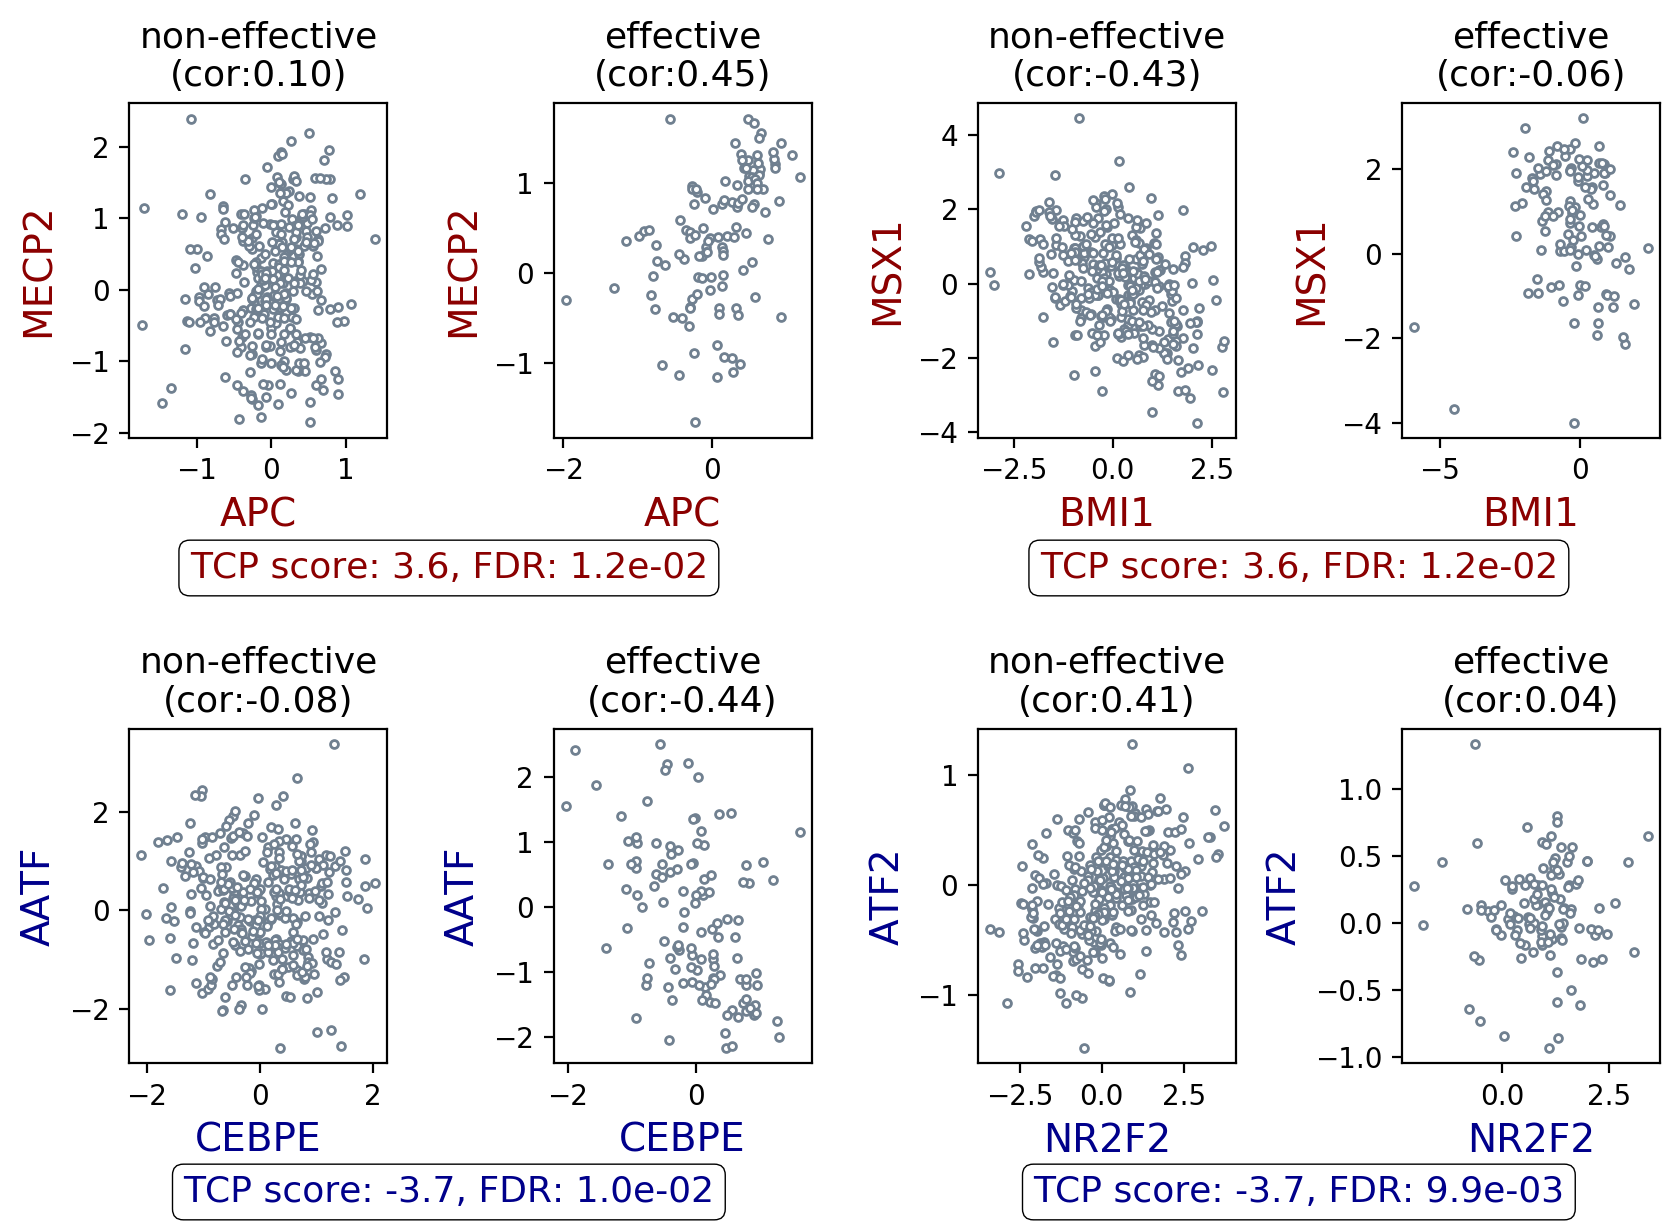

In [15]:
def get_top_TTP(cell, TCP1, TCP2):
    corr_df=pd.read_table('result/TCPscore/TCPS_{}.txt'.format(cell), sep='\t',index_col=0,engine='python')
    corr_df.set_index(['g1','g2'], inplace=True)
    corr_df.sort_values(by='Zobs(TCPS)',ascending=False, inplace=True)
    pos_TCP=corr_df.loc[TCP1]
    neg_TCP=corr_df.loc[TCP2]
    
    print(pos_TCP)
    print(neg_TCP)
    return ((pos_TCP.name, pos_TCP['corrE'], pos_TCP['corrNE'], pos_TCP['Zobs(TCPS)'], pos_TCP['FDR']),
            (neg_TCP.name, neg_TCP['corrE'], neg_TCP['corrNE'], neg_TCP['Zobs(TCPS)'], neg_TCP['FDR']))

def draw_scatter_plot(TFA_df, TP1, TP2, corr, effect, label_color, ax):
    x=TFA_df.loc[TFA_df['effect']==effect,TP1]
    y=TFA_df.loc[TFA_df['effect']==effect,TP2]
    ax.scatter(x,y, edgecolor='slategray', c='white',s=8)
    if effect==0:
        ax.set_title('non-effective\n(cor:{:.2f})'.format(corr), fontsize=13)
    if effect==1:
        ax.set_title('effective\n(cor:{:.2f})'.format(corr), fontsize=13)
    
    ax.set_xlabel(TP1, color=label_color, fontsize=14)
    ax.set_ylabel(TP2, color=label_color, fontsize=14)
    
    
fig = plt.figure(figsize=(8.5,6), dpi=200)
ax_list = fig.subplots(2,4).flatten()


##### TCP plots
cell='A375'
(pos_TCP, pos_effect_corr, pos_nonEffect_corr, pos_TCPS, pos_TCP_FDR), (neg_TCP, neg_effect_corr, neg_nonEffect_corr, neg_TCPS, neg_TCP_FDR) =get_top_TTP(cell,('APC','MECP2'),('BMI1','MSX1'))

## ax2,3,4,5
TFA_df=pd.read_table('result/TF_activity/effect/TFA_Effect_{}_all.txt'.format(cell), sep='\t',engine='python')

draw_scatter_plot(TFA_df, pos_TCP[0], pos_TCP[1], pos_nonEffect_corr, 0, 'darkred', ax_list[0])
draw_scatter_plot(TFA_df, pos_TCP[0], pos_TCP[1], pos_effect_corr   , 1, 'darkred', ax_list[1])
draw_scatter_plot(TFA_df, neg_TCP[0], neg_TCP[1], neg_nonEffect_corr, 0, 'darkred', ax_list[2])
draw_scatter_plot(TFA_df, neg_TCP[0], neg_TCP[1], neg_effect_corr   , 1, 'darkred', ax_list[3])

### add text for TCP score and FDR
fig.text(0.27,0.51, 'TCP score: {:.1f}, FDR: {:.1e}'.format(pos_TCPS,pos_TCP_FDR), horizontalalignment='center', fontsize=13, color='darkred',
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
fig.text(0.77,0.51, 'TCP score: {:.1f}, FDR: {:.1e}'.format(neg_TCPS,neg_TCP_FDR), horizontalalignment='center', fontsize=13, color='darkred',
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

#fig.text(0.5,0.52,'Normalized TFA', ha='center', va='center', fontsize=15)


##### TCP plots
cell='A375'
(pos_TCP, pos_effect_corr, pos_nonEffect_corr, pos_TCPS, pos_TCP_FDR), (neg_TCP, neg_effect_corr, neg_nonEffect_corr, neg_TCPS, neg_TCP_FDR) =get_top_TTP(cell,('CEBPE','AATF'),('NR2F2','ATF2'))

## ax2,3,4,5
TFA_df=pd.read_table('result/TF_activity/effect/TFA_Effect_{}_all.txt'.format(cell), sep='\t',engine='python')

draw_scatter_plot(TFA_df, pos_TCP[0], pos_TCP[1], pos_nonEffect_corr, 0, 'darkblue', ax_list[4])
draw_scatter_plot(TFA_df, pos_TCP[0], pos_TCP[1], pos_effect_corr   , 1, 'darkblue', ax_list[5])
draw_scatter_plot(TFA_df, neg_TCP[0], neg_TCP[1], neg_nonEffect_corr, 0, 'darkblue', ax_list[6])
draw_scatter_plot(TFA_df, neg_TCP[0], neg_TCP[1], neg_effect_corr   , 1, 'darkblue', ax_list[7])

### add text for TCP score and FDR
fig.text(0.27,-0.01, 'TCP score: {:.1f}, FDR: {:.1e}'.format(pos_TCPS,pos_TCP_FDR), horizontalalignment='center', fontsize=13, color='darkblue',
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
fig.text(0.77,-0.01, 'TCP score: {:.1f}, FDR: {:.1e}'.format(neg_TCPS,neg_TCP_FDR), horizontalalignment='center', fontsize=13, color='darkblue',
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

fig.tight_layout(h_pad=4)
fig.show()